# Extract data at station points from downscaled models
## Climatologies and time series for interannual 

In [45]:
import xarray as xr
import numpy as np
import pandas as pd
import re
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') #filter some warning messages

In [46]:
# data files from shared folder from daisy. 
##downloaded into large data
##deleted after points extracted

# site locations - moorings - time series
ooi_co =np.array([[47.1336, -124.272,29], # inshore: lat, lon, depth (surface always 7m)
     [46.9859, -124.566, 88], # shelf
     [46.8508, -124.972, 540]]) # offshore
locs = ['Inshore','Shelf','Offshore']

# site locations - WOA - only climatology
WOA_T1 = [46.875,-124.875,150]
WOA_T2 = [47.375,-124.625,100]
WOA_T3 = [46.375,-124.375,70]

WOA_O1 = [46.5,-124.5,125]
WOA_O2 = [47.5,-124.5,25] 

# time period to compare
itime = '1993-01-01'
ftime = '2020-12-31'

# data directory
dwdir = '~/Documents/LargeData/QIN/downscaled_GCMs/'

# figure directory
figdir = '/Users/sol/Google Drive/professional/research/projects/2020_QIN/figures/Comparison_Obs_Glorys/'

In [60]:
# Temperature 
# select each point
# OOI

# surface
ddir = '/Users/Sol/Downloads/surface/'
for i in range(3):
    # OOI coordinates
    lati = ooi_co[i,0]
    loni = ooi_co[i,1]+360

    mo = 0
    for fn in glob.glob(ddir+'*.nc'):
        fnw1 = re.split('/',fn)
        fnw = re.split('_',fnw1[5])
        #print(fnw[0])
        
        # read file
        ds = xr.open_dataset(fn)
        ds.close()
        # select time (years when data is available)
        ds = ds.sel(time=slice(itime,ftime))
        
        tmp = ds.thetao.sel(lat=slice(lati-0.1, lati+0.1), lon=slice(loni-0.1,loni+0.1))
        tmp = tmp.mean(dim={'lat','lon'})
        
        # save in dataframe
        if mo == 0: # first time, create file
            tmp2 = pd.DataFrame(data=ds.time.dt.year.values,columns={'year'})
            tmp2['month']=ds.month.values
            tmp2['day']=1
            tmp2['Datetime']=pd.to_datetime(tmp2[list(tmp2)[:3]])
            tmp2 = tmp2.set_index('Datetime')
            tmp2.index.names=['']
            tmp2[fnw[0]+'-'+fnw[1]] = tmp.values            
            tmp2=tmp2.drop(['year','month','day'], axis=1)
            tmp2.to_csv(dwdir+'OOI_'+locs[i]+'_surface_thetao.csv')
            mo = 1
        else: # not the first time, so open file and add column
            tmp3 = pd.read_csv(dwdir+'OOI_'+locs[i]+'_surface_thetao.csv',index_col=0)
            tmp3[fnw[0]+'-'+fnw[1]]=tmp.values
            tmp3.to_csv(dwdir+'OOI_'+locs[i]+'_surface_thetao.csv')



In [73]:
# Temperature 
# select each point
# OOI

# bottom
ddir = '/Users/Sol/Downloads/bottom/'
for i in range(3):
    # OOI coordinates
    lati = ooi_co[i,0]
    loni = ooi_co[i,1]+360

    mo = 0
    for fn in glob.glob(ddir+'*.nc'):
        fnw1 = re.split('/',fn)
        fnw = re.split('_',fnw1[5])
        #print(fnw1[5])
        
        # read file
        ds = xr.open_dataset(fn)
        ds.close()
        # select time (years when data is available)
        ds = ds.sel(time=slice(itime,ftime))
        
        tmp = ds.thetao.sel(lat=slice(lati-0.1, lati+0.1), lon=slice(loni-0.1,loni+0.1))
        tmp = tmp.mean(dim={'lat','lon'})
        
        # save in dataframe
        if mo == 0: # first time, create file
            tmp2 = pd.DataFrame(data=ds.time.dt.year.values,columns={'year'})
            tmp2['month']=ds.month.values
            tmp2['day']=1
            tmp2['Datetime']=pd.to_datetime(tmp2[list(tmp2)[:3]])
            tmp2 = tmp2.set_index('Datetime')
            tmp2.index.names=['']
            tmp2[fnw[0]+'-'+fnw[1]] = tmp.values            
            tmp2=tmp2.drop(['year','month','day'], axis=1)
            tmp2.to_csv(dwdir+'OOI_'+locs[i]+'_bottom_thetao.csv')
            mo = 1
        else: # not the first time, so open file and add column
            tmp3 = pd.read_csv(dwdir+'OOI_'+locs[i]+'_bottom_thetao.csv',index_col=0)
            tmp3[fnw[0]+'-'+fnw[1]]=tmp.values
            tmp3.to_csv(dwdir+'OOI_'+locs[i]+'_bottom_thetao.csv')



In [74]:
# O2 
# select each point
# OOI

# surface
ddir = '/Users/Sol/Downloads/surface/'
for i in range(3):
    # OOI coordinates
    lati = ooi_co[i,0]
    loni = ooi_co[i,1]+360

    mo = 0
    for fn in glob.glob(ddir+'*.nc'):
        fnw1 = re.split('/',fn)
        fnw = re.split('_',fnw1[5])
        #print(fnw[0])
        
        # read file
        ds = xr.open_dataset(fn)
        ds.close()
        # select time (years when data is available)
        ds = ds.sel(time=slice(itime,ftime))
        
        tmp = ds.o2.sel(lat=slice(lati-0.1, lati+0.1), lon=slice(loni-0.1,loni+0.1))
        tmp = tmp.mean(dim={'lat','lon'})
        
        # save in dataframe
        if mo == 0: # first time, create file
            tmp2 = pd.DataFrame(data=ds.time.dt.year.values,columns={'year'})
            tmp2['month']=ds.month.values
            tmp2['day']=1
            tmp2['Datetime']=pd.to_datetime(tmp2[list(tmp2)[:3]])
            tmp2 = tmp2.set_index('Datetime')
            tmp2.index.names=['']
            tmp2[fnw[0]+'-'+fnw[1]] = tmp.values            
            tmp2=tmp2.drop(['year','month','day'], axis=1)
            tmp2.to_csv(dwdir+'OOI_'+locs[i]+'_surface_o2.csv')
            mo = 1
        else: # not the first time, so open file and add column
            tmp3 = pd.read_csv(dwdir+'OOI_'+locs[i]+'_surface_o2.csv',index_col=0)
            tmp3[fnw[0]+'-'+fnw[1]]=tmp.values
            tmp3.to_csv(dwdir+'OOI_'+locs[i]+'_surface_o2.csv')

# surface
ddir = '/Users/Sol/Downloads/bottom/'
for i in range(3):
    # OOI coordinates
    lati = ooi_co[i,0]
    loni = ooi_co[i,1]+360

    mo = 0
    for fn in glob.glob(ddir+'*.nc'):
        fnw1 = re.split('/',fn)
        fnw = re.split('_',fnw1[5])
        #print(fnw[0])
        
        # read file
        ds = xr.open_dataset(fn)
        ds.close()
        # select time (years when data is available)
        ds = ds.sel(time=slice(itime,ftime))
        
        tmp = ds.o2.sel(lat=slice(lati-0.1, lati+0.1), lon=slice(loni-0.1,loni+0.1))
        tmp = tmp.mean(dim={'lat','lon'})
        
        # save in dataframe
        if mo == 0: # first time, create file
            tmp2 = pd.DataFrame(data=ds.time.dt.year.values,columns={'year'})
            tmp2['month']=ds.month.values
            tmp2['day']=1
            tmp2['Datetime']=pd.to_datetime(tmp2[list(tmp2)[:3]])
            tmp2 = tmp2.set_index('Datetime')
            tmp2.index.names=['']
            tmp2[fnw[0]+'-'+fnw[1]] = tmp.values            
            tmp2=tmp2.drop(['year','month','day'], axis=1)
            tmp2.to_csv(dwdir+'OOI_'+locs[i]+'_bottom_o2.csv')
            mo = 1
        else: # not the first time, so open file and add column
            tmp3 = pd.read_csv(dwdir+'OOI_'+locs[i]+'_bottom_o2.csv',index_col=0)
            tmp3[fnw[0]+'-'+fnw[1]]=tmp.values
            tmp3.to_csv(dwdir+'OOI_'+locs[i]+'_bottom_o2.csv')


In [75]:
ds

<xarray.Dataset>
Dimensions:  (lat: 216, lon: 300, time: 336)
Coordinates:
  * time     (time) datetime64[ns] 1993-01-16 1993-02-16 ... 2020-12-16
  * lat      (lat) float32 31.0 31.083334 31.166666 ... 48.833332 48.916668
  * lon      (lon) float32 220.0 220.08333 220.16667 ... 244.83334 244.91666
    month    (time) int64 ...
Data variables:
    o2       (time, lat, lon) float64 ...
Attributes:
    author:                   Trond Kristiansen
    cmip6_ba+sd_cmip6_model:  UKESM1-0-LL
    cmip6_ba+sd_version:      ISIMIP3BASD v2.4.1
    git_sha:                  e87f75a281b2f8cbaea5ed9b06cae5aae4a422a7
    git_url:                  https://github.com/trondkr/CMIP6-downscale
    model:                    U.K. Community Earth System Modeling for CMIP6
    Conventions:              CF-1.7

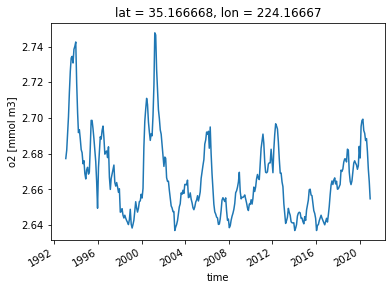

In [76]:
ds.o2[:,50,50].plot()